## Name: Chandrika M jethva
## Roll no: 130
## Class / Btach: SE AIML / B - 2
## Date: 05 / 02 / 2026
## Experiment-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

# Ordinary Least Squares (OLS)

### Step 1: Import Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Input Data

In [3]:
X= np.array([1, 2, 3]).reshape(-1, 1)    # Input
Y = np.array([2, 3, 5])    # Output

print(X.shape)

(3, 1)


### Step 3: Create Model & Fit

In [4]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Step 4: Get Coefficients(MLE) Estimate

In [5]:
w = model.coef_[0]
b = model.intercept_

print(f"w (slope) = {w}")
print(f"b (interecept) = {b}")

w (slope) = 1.4999999999999998
b (interecept) = 0.3333333333333339


### Step 5: Make Prediction

In [7]:
y_pred = model.predict(X)
print("\nPredictions for training data:")
for xi, yi, ypi in zip(X.flatten(), Y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales = {ypi:.2f}")


Predictions for training data:
X=1, Actual Sales=2, Predicted Sales = 1.83
X=2, Actual Sales=3, Predicted Sales = 3.33
X=3, Actual Sales=5, Predicted Sales = 4.83


### Step 6: Calculate Metrics

In [10]:
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"\nMean Squared error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared error (MSE) = 0.0556
R² Score = 0.9643


## Lab Recitation Question

In [11]:
X = np.array([10, 20, 30, 50]).reshape(-1, 1)
y = np.array([12, 21, 29, 48])
# print(X.shape)

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_

print(f"w (slope) = {w}")
print(f"b (interecept) = {b}")

y_pred = model.predict(X)
print("\nPredictions for training data:")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales = {ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")

w (slope) = 0.8971428571428574
b (interecept) = 2.828571428571422

Predictions for training data:
X=10, Actual Sales=12, Predicted Sales = 11.80
X=20, Actual Sales=21, Predicted Sales = 20.77
X=30, Actual Sales=29, Predicted Sales = 29.74
X=50, Actual Sales=48, Predicted Sales = 47.69

Mean Squared error (MSE) = 0.1857
R² Score = 0.9989


# Maximum Likelihood Estimation (MLE)

In [52]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
X = np.array([1, 2, 3]).reshape(-1, 1)    # Input
Y = np.array([2, 3, 5])    # Output

print(X.shape)

(3, 1)


In [54]:
# Negative Log-Likelihood Function
def neg_log_likelihood(parameters):
    w, b = parameters
    sigma2 = 1   # Assume variance = 1 for simplicity
    y_pred = w * X + b
    nll = 0.5 * np.sum((Y - y_pred) ** 2 / sigma2)    # -log likelihood up to constants
    return nll

In [55]:
# Initial guess for w, b
initial_guess = [0, 0]

In [56]:
# Minimize negative Log_Likelihood
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")

MLE w = -8.408028034221e-08
MLE b = 3.3333335514502647


### Step 6: Make Predictions

In [57]:
# Make predictions using estimated pARAMETERS
y_pred = w_mle * X + b_mle

print("\nPredictions for training data:")
for xi, yi, ypi in zip(X, Y, y_pred):
    print(f"X = {xi.item()}, Actual = {yi}, Predicted = {ypi.item():.2f}")


Predictions for training data:
X = 1, Actual = 2, Predicted = 3.33
X = 2, Actual = 3, Predicted = 3.33
X = 3, Actual = 5, Predicted = 3.33


In [58]:
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"\nMean Squared error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared error (MSE) = 1.5556
R² Score = -0.0000


# Gradient Descent (GD)

In [65]:
# Gradient Descent
X = np.array([1, 2, 3])
w, b = 0, 0
alpha = 0.0001
n_iter = 1000
n = len(X)

In [66]:
for i in range(n_iter):
    y_pred = w * X.flatten() + b
    dw = (-2 / n) * np.sum(X.flatten() * (Y - y_pred))
    db = (-2 / n) * np.sum((Y - y_pred))
    w -= alpha * dw
    b -= alpha * db

print("Slope (w):", w)
print("Intercept (b):", b)


Slope (w): 0.9277932204091286
Intercept (b): 0.4003820339618283


In [67]:
# Step 6: Make Predictions
# Make predictions using estimated pARAMETERS
y_pred = w * X + b

print("\nPredictions for training data:")
for xi, yi, ypi in zip(X, Y, y_pred):
    print(f"X = {xi.item()}, Actual = {yi}, Predicted = {ypi.item():.2f}")


Predictions for training data:
X = 1, Actual = 2, Predicted = 1.33
X = 2, Actual = 3, Predicted = 2.26
X = 3, Actual = 5, Predicted = 3.18


In [68]:
# Step 7: Calculate Metrics
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"\nMean Squared error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared error (MSE) = 1.4346
R² Score = 0.0778


## GD with single parameters

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
X = np.array([1, 2, 3])    # Input
y = np.array([2, 3, 5])    # Output

n = len(X)

In [71]:
def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return np.sum((y - y_pred) ** 2)

In [72]:
# Gradient of J w.r.t w1
def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return -2 * np.sum(X * (y - y_pred))

In [73]:
# Gradient Descent
lr = 0.1
w1 = 4
iterations = 15

w1_values = []
loss_values = []

for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))

    grad = gradient(w1)
    w1 = w1 - lr * grad

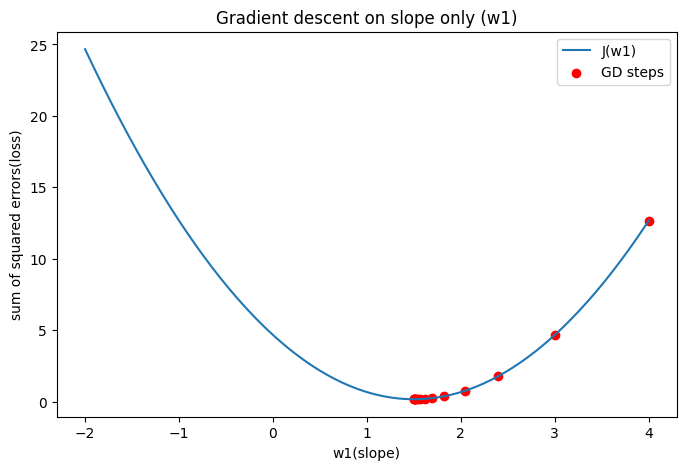

In [74]:
# PLot Loss Curve
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8, 5))
plt.plot(w_space, loss_space, label = "J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD steps")
plt.xlabel("w1(slope)")
plt.ylabel("sum of squared errors(loss)")
plt.title("Gradient descent on slope only (w1)")
plt.legend()
plt.show()